## Model performance on real data given pretraining alone
Testing whether pretraining on synthetic data alone results in a correct prediction 

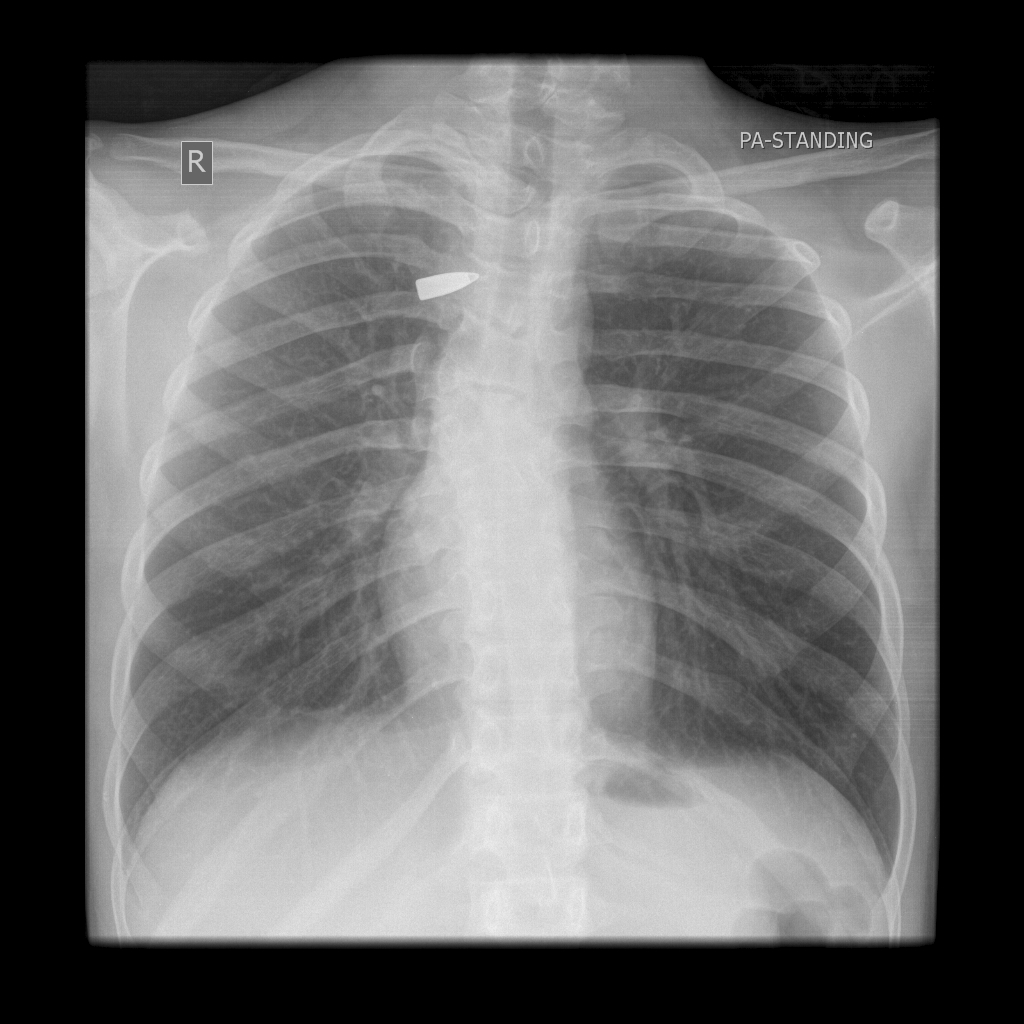

In [29]:
test_image_path_bullet = 'test_image/bullet_chest.jpg'

test_image_bullet = Image.open(test_image_path_bullet)

test_image_bullet

In [26]:
learn.predict(test_image_path_bullet)

('no_mod',
 TensorBase(3),
 TensorBase([6.1612e-04, 8.4187e-05, 2.0542e-04, 9.9909e-01]))

This is incorrect prediction. The pretrained model believes that this image of a bullet is actually 'no mod'. This is, funnily enough, correct. This is an unmodified image. However, it is not a good prediction in the spirit of the experiment. It should predict 'bullet'.

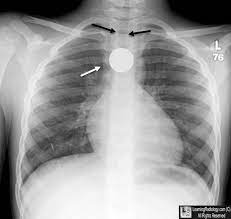

In [30]:
test_image_path_coin = 'test_image/coin_trachea.jpg'

test_image_coin = Image.open(test_image_path_coin)

test_image_coin

In [31]:
learn.predict(test_image_path_coin)

('bullet', TensorBase(0), TensorBase([0.6143, 0.0010, 0.0014, 0.3833]))

Another incorrect prediction. To make sure the model was not just predicting bullet due to the arrows, I removed them myself as they represent educational artefacts.

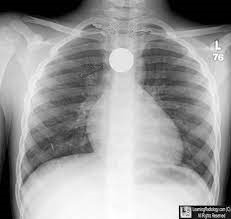

In [32]:
test_image_path_coin = 'test_image/coin_trachea_artefacts_removed.jpg'

test_image_coin = Image.open(test_image_path_coin)

test_image_coin

In [33]:
learn.predict(test_image_path_coin)

('no_mod',
 TensorBase(3),
 TensorBase([1.7803e-04, 6.6784e-05, 4.9666e-04, 9.9926e-01]))

The model is incorrect again. It should predict 'coin'. However, it predicts 'no mod'.

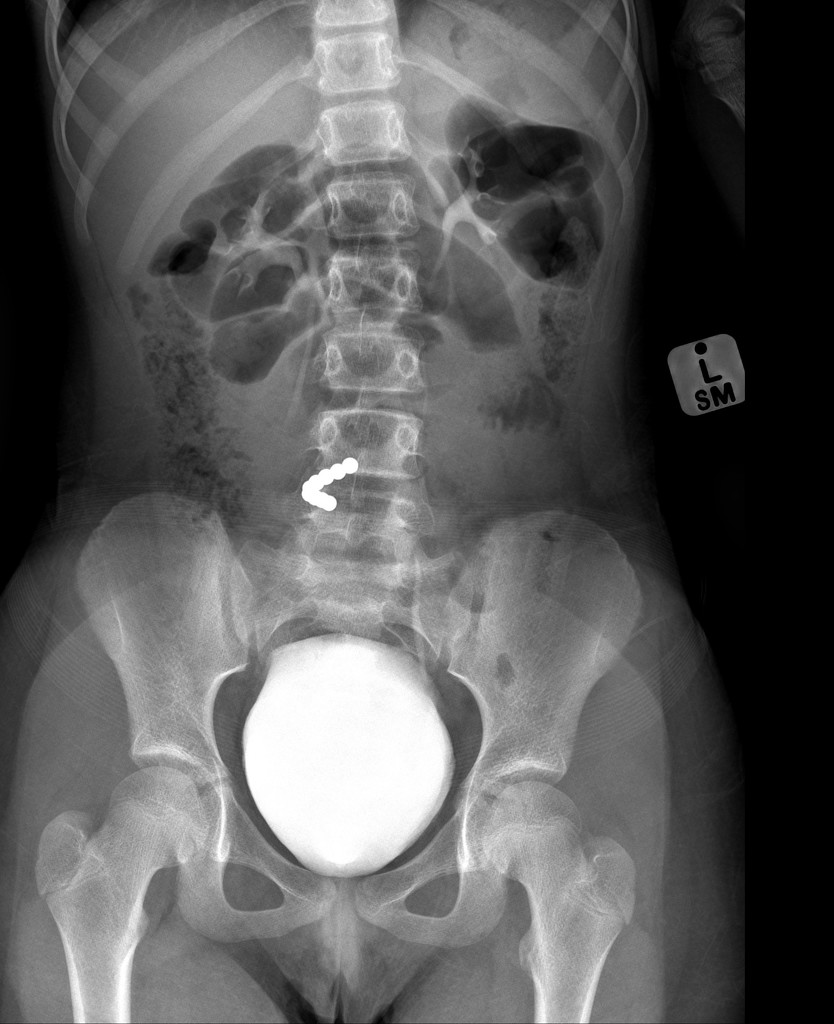

In [34]:

test_image_path_magnets = 'test_image/magnets_stomach.jpeg'

test_image_magnets = Image.open(test_image_path_magnets)

test_image_magnets

In [35]:
learn.predict(test_image_path_magnets)

('bullet', TensorBase(0), TensorBase([0.6762, 0.0010, 0.0010, 0.3217]))

Remarkably, the model is now predicting bullet. The model is wrong again, in a different way.

## Conclusion

The model achieved high internal validity on its synthetic dataset. Sensitivity and specificity are approximately 99%. This speaks to the power of the underlying training, much of which is automated by the fastai package.
It has failed to achieve good predictions on real data. This indicates that my synthetic data is not similar to the real data in such a way that the model's high performance on the training dataset has external validity.

What we have not tested is whether the pretraining of the model on synthetic data increased performance of the same model then trained on a dataset of real data. Given more time, I would have liked to assemble a dataset of 300 Xrays of real foreign bodies (coins, bullets, magnets etc) and demonstrated the final performance of a model trained on:

1) Synthetic data alone
2) Real data alone
3) Synthetic data then real data.

If the performance of model trained by method 3) superseded the performance of models trained by method 1) and 2), then my hypothesis that synthetic data improves model performance would be validated. 

As it stands now, I will wait until GPU resources are available, and then create synthetic CT volumes with stones, pre-train on them, with the intention of using that pre-trained model on the real CT volume data I have labelled within my hospital.